# Project 1 Data Exploration and Analysis
##### 5/16/2020
##### Yang Zhang, Reannan McDaniel, Jonathan Roach, Fred Poon

### Business Understanding - describe the purpose of the data set you selected.

In [ ]:
# [10] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How  would you measure the effectiveness of a good prediction algorithm? Be specific.

### Data Understanding

#### Describe the attributes

In [1]:
import pandas as pd

# [10] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

df = pd.read_csv('PublicSchools2014to2017_YZ.csv')
df.head()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 259 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   vphone_ad                            object 
 1   street_ad                            object 
 2   scity_ad                             object 
 3   szip_ad                              float64
 4   category_cd                          object 
 5   url_ad                               object 
 6   grade_range_cd                       object 
 7   calendar_type_txt                    object 
 8   sna_pgm_type_cd                      object 
 9   school_type_txt                      object 
 10  calendar_only_txt                    object 
 11  title1_type_cd                       object 
 12  District Name                        object 
 13  esea_status                          object 
 14  student_num                          float64
 15  lea_avg_student_num                  

In [21]:
# filtering to only Regular Schools'
print(df["school_type_txt"].unique())
df2 = df[df["school_type_txt"] == 'Regular School']

['Regular School' 'Alternative Education' 'Magnet School'
 'Special Education' 'Hospital School' '0' 'Vocational Education']


In [19]:
df2["school_type_txt"].unique()

array(['Regular School'], dtype=object)

In [23]:
# df2["category_cd"].unique()
df2["category_cd"] = df2["category_cd"].map({"A": "Elem/Mid/High", "E": "Elementary", "H": "High", "I": "Elem/Mid", "M": "Middle"})
df2["category_cd"].unique()


#   schools$category_cd == 'A' ~ 'Elem./Mid./High Together',
#   schools$category_cd == 'E' ~ 'Elementary School',
#   schools$category_cd == 'H' ~ 'High School',
#   schools$category_cd == 'I' ~ 'Elem./Mid. Together',
#   schools$category_cd == 'M' ~ 'Middle School',

array(['High', 'Elementary', 'Middle', 'Elem/Mid', nan, 'Elem/Mid/High'],
      dtype=object)

In [ ]:
# [15] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods. 

#### Visualize appropriate statistics (summary statistics)

In [3]:
# [10] Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

df.describe()

,szip_ad,student_num,lea_avg_student_num,st_avg_student_num,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,...,MinorityFemalePct,MinorityMalePct,PacificIslandFemalePct,PacificIslandMalePct,PacificIslandPct,TwoOrMoreFemalePct,TwoOrMoreMalePct,TwoOrMorePct,unit_code,Year
count,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,...,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000
mean,27981.523173,588.443634,588.456171,587.764053,8.818107,8992.041761,0.673819,0.080056,0.079985,0.008898,...,0.244632,0.257577,0.000615,0.000605,0.001220,0.018981,0.019518,0.038499,521799.009763,2015.502518
std,517.884899,381.356319,270.983795,150.891747,11.182555,1023.850284,0.095480,0.014983,0.016110,0.008045,...,0.135447,0.145799,0.001630,0.001987,0.003048,0.012153,0.013010,0.022044,277612.242405,1.118410
min,27006.000000,1.000000,0.000000,0.000000,0.000000,7282.190000,0.547000,0.047000,0.028000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10303.000000,2014.000000
25%,27529.000000,346.000000,438.000000,490.000000,0.000000,8362.900000,0.613000,0.069000,0.069000,0.005000,...,0.131897,0.135066,0.000000,0.000000,0.000000,0.010526,0.010851,0.023256,290388.000000,2015.000000
50%,28052.000000,520.000000,533.000000,496.000000,0.000000,8779.340000,0.628000,0.080000,0.080000,0.007000,...,0.231405,0.241470,0.000000,0.000000,0.000000,0.017214,0.017526,0.035422,510378.000000,2016.000000
75%,28394.500000,731.000000,698.500000,665.000000,20.000000,9326.890000,0.763000,0.087000,0.091000,0.011000,...,0.350713,0.368103,0.000000,0.000000,0.001656,0.025101,0.025716,0.049874,770348.000000,2017.000000
max,28906.000000,2974.000000,1852.000000,860.000000,43.000000,17801.850000,0.878000,0.153000,0.143000,0.065000,...,0.991150,1.000000,0.037415,0.076923,0.094595,0.095890,0.250000,0.250000,995336.000000,2017.000000


#### Visualize most interesting attributes

In [ ]:
# [15] Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate. 

#### Visualize relationships

In [ ]:
# [15] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships. 

Identify and explain interesting relationships

In [ ]:
# [10] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification). 

#### Other features

In [ ]:
# [5] Are there other features that could be added to the data or created from existing features? Which ones? 

### Exceptional Work

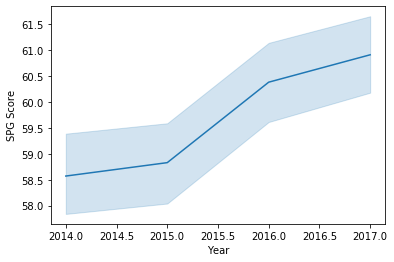

In [4]:
# [10]
# • You have free reign to provide additional analyses.
# • One idea: implement dimensionality reduction, then visualize and interpret the results. 

import seaborn as sb

# reducing the amount of columns
df = df[df["school_type_txt"]!= 0]
sb.lineplot(x="Year", y="SPG Score", data=df)

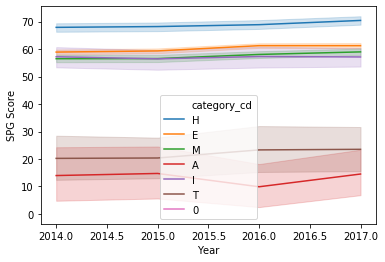

In [5]:
# trendline by category
sb.lineplot(x="Year", y="SPG Score", hue="category_cd", data=df)

In [14]:
from sklearn.decomposition import PCA
import numpy as np

# let's start by first changing the numeric values to be floats
continuous_features = []

# and the oridnal values to be integers
ordinal_features = []

# we won't touch these variables, keep them as categorical
categ_features = [];

# use the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

df.info() # now our data looks better!!

df.info(verbose=True)
df_pca =

pca = PCA(n_components=2)
x_pca = pca.fit(df).transform(df)

SyntaxError: invalid syntax (<ipython-input-14-367da6a63bc3>, line 5)